# audio_get

Retrieve and visualise spectrogram for audio exemplars

In [1]:
from moviepy.editor import VideoFileClip
from scipy import signal
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
from data_converter import DataConverter
import shutil
import os
import random

def convert_mp4_to_wav_moviepy(input_file, output_file):
    clip = VideoFileClip(input_file)
    clip.audio.write_audiofile(output_file)

In [ ]:
#get countix av video

#item = "0rvWeDPPQ3M_000007_000017" #3

# item = "8re8pXSK_RQ_000006_000016" #7

item = "-4-17eFSRIE_000056_000066" #6

input_file = f"/datasets/Kinetics700-2020/test/Kinetics700-2020-test/{item}.mp4"
output_file = f"{item}.mp4"

In [16]:
shutil.copy(input_file, output_file)

'8re8pXSK_RQ_000006_000016.mp4'

In [4]:
#get extreme countix av

# item = "624rDx0cR_Y.00"
# category = "cluttered background"

# item = "uby2dcP6cmw"
# category = "cluttered background"

# item = "-Tok_g_jgE0"
# category = "out of view movement"

# item = "Zd4YteIMwWY"
# category = "out of view movement"

item = "6d_RTzFfQUE"
category = "out of view movement"

output_file = f"{item}.wav"

shutil.copy(f"/scratch/local/ssd/hani/ExtremeCountixAV/Audio/{category}/{item}.wav", output_file)


'6d_RTzFfQUE.wav'

In [5]:
#get musan audio

#folder = "/scratch/local/ssd/hani/musan/music/hd-classical"
#folder = "/scratch/local/ssd/hani/musan/music/jamendo"
folder = "/scratch/local/ssd/hani/musan/music/fma"

item = random.choice(os.listdir(folder))
output_file = f"{item}"
shutil.copy(f"{folder}/{item}", output_file)

'music-fma-0107.wav'

(441344,) 44100


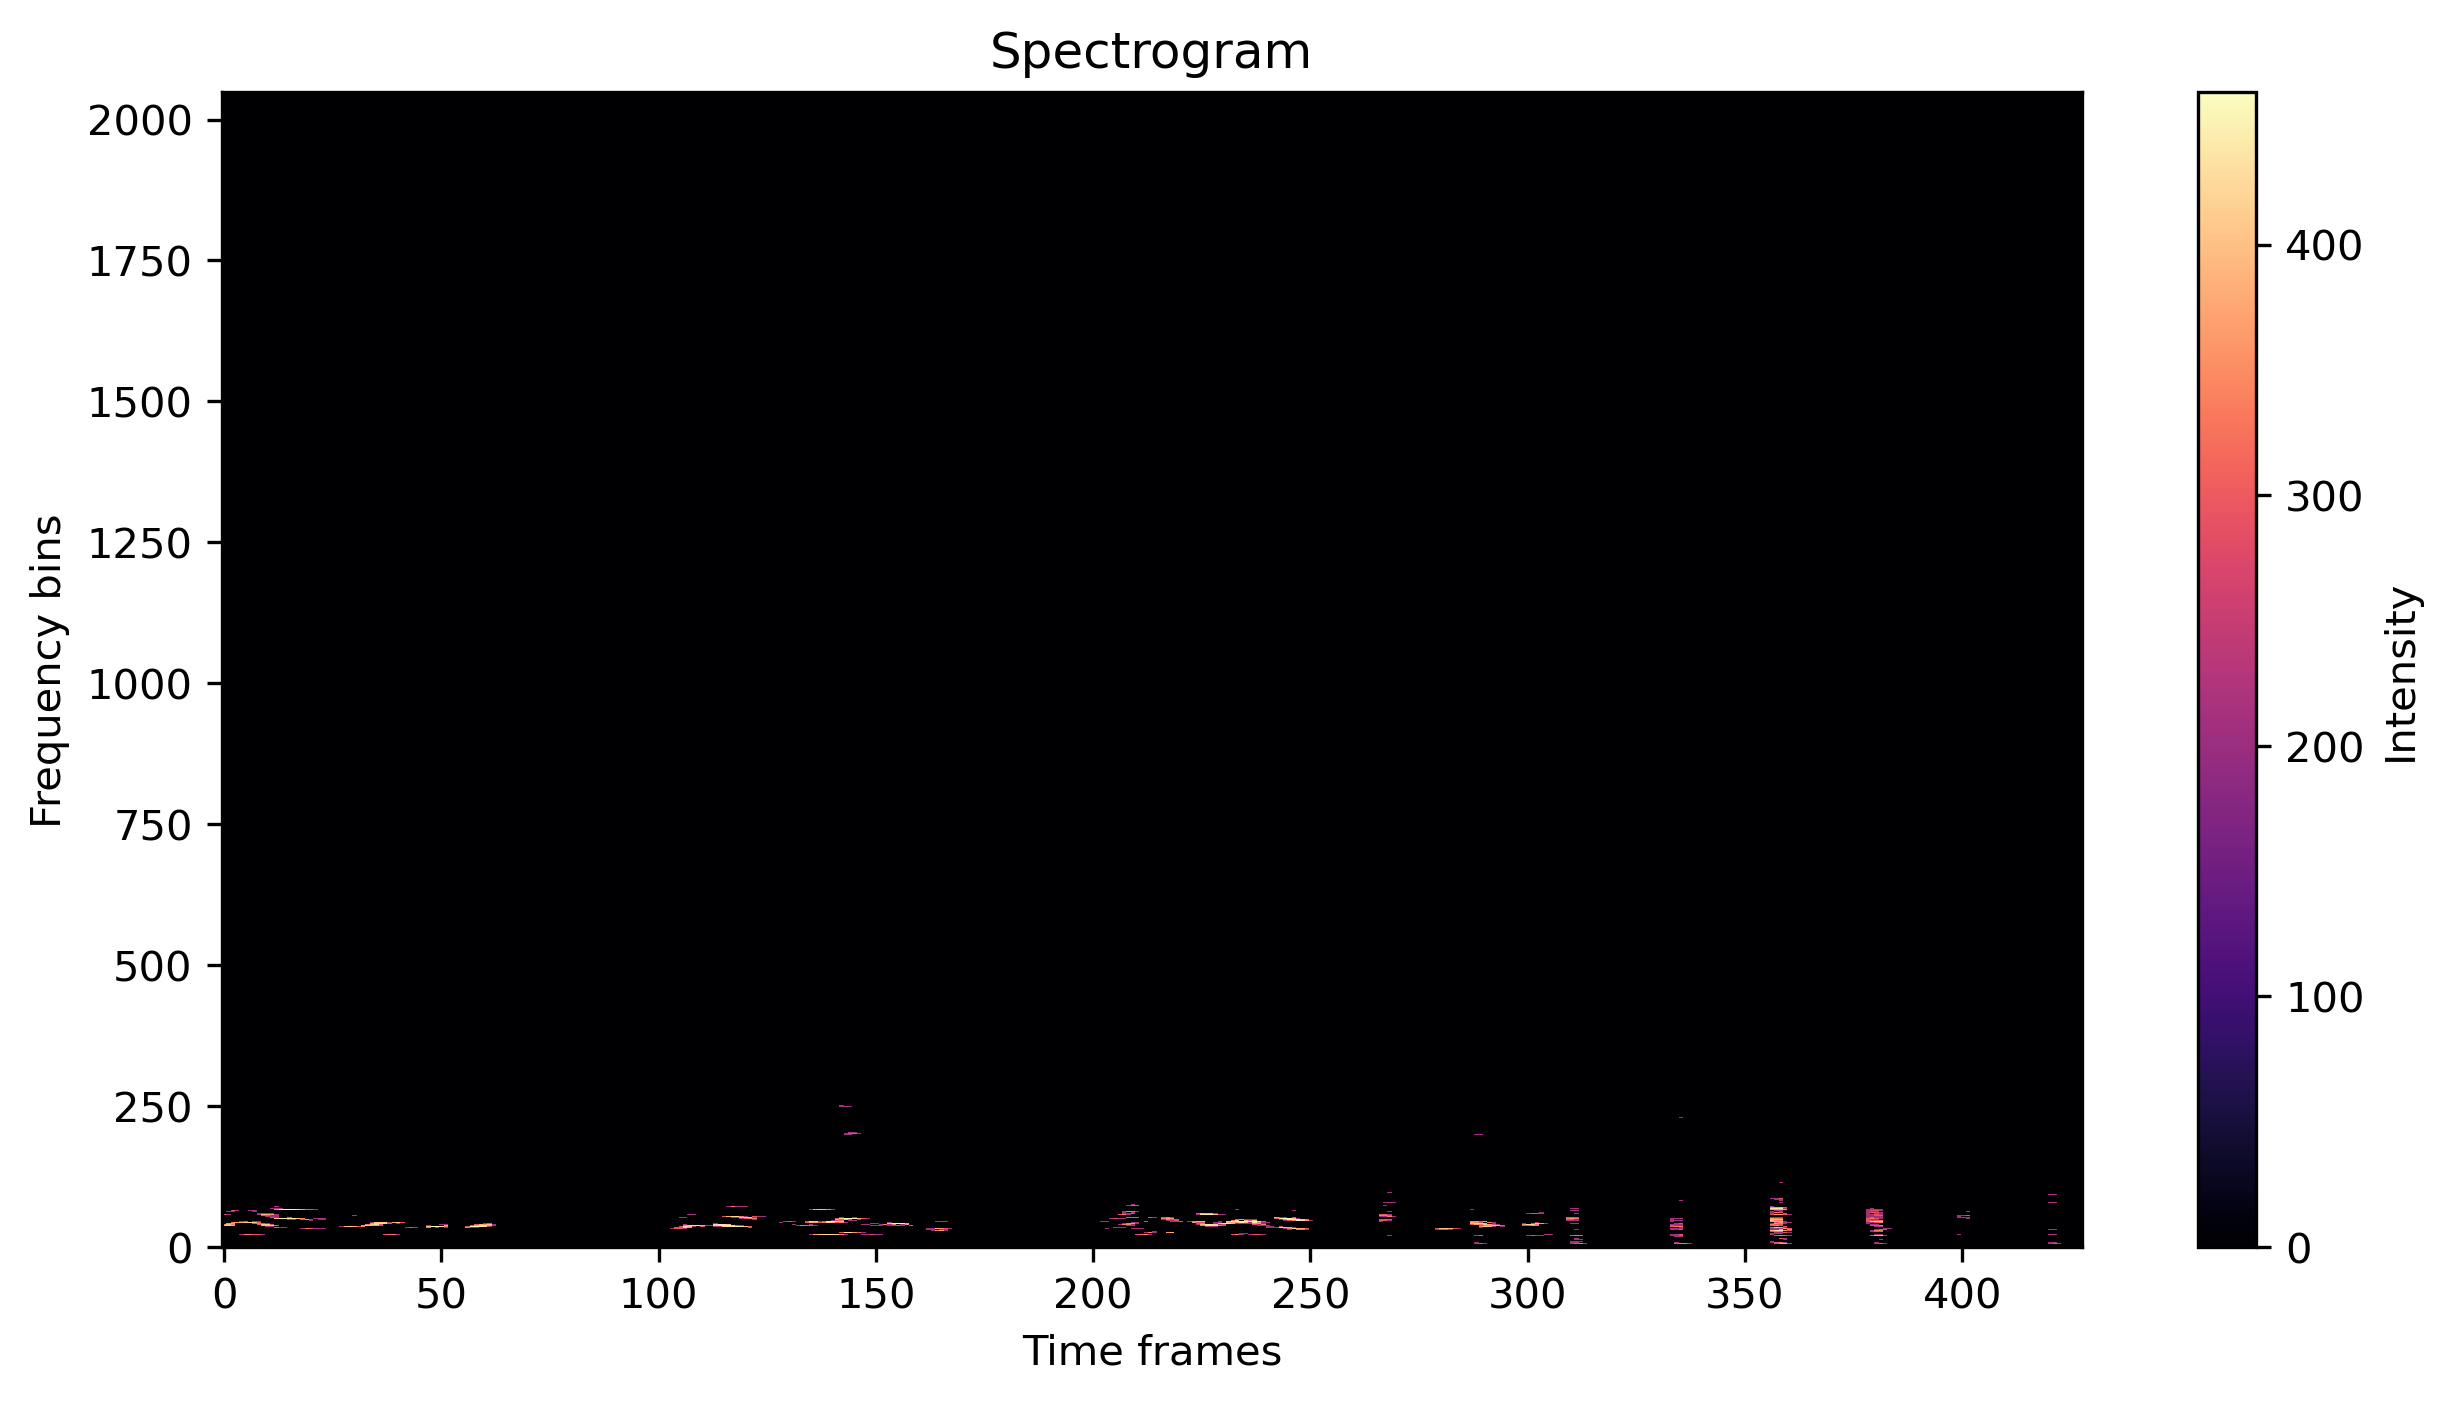

In [17]:
#VISUALISE SOUND AS SPECTROGRAM

waveform, sr = torchaudio.load(output_file)
waveform = waveform.mean(dim=0).numpy()
print(waveform.shape, sr)
_, _, spectrogram = signal.spectrogram(waveform, sr, nperseg=4096, noverlap=3072)

mean = np.mean(spectrogram)
std = np.std(spectrogram)
spectrogram = np.divide(spectrogram - mean, std + 1e-9)

data_converter = DataConverter()

spectrogram = data_converter.apply_histogram_equalisation(spectrogram, method="global")

#visualise 

plt.figure(dpi=300, figsize=(10, 5))
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
plt.title('Spectrogram')
plt.ylabel('Frequency bins')
plt.xlabel('Time frames')
plt.colorbar(label='Intensity')
plt.show()